In [3]:
# Plot the data
import matplotlib.pyplot as plt
import numpy as np
from stateprep_qet.utils import (
    amp_to_prob,
    find_angle,
    h,
    h_hat,
    normalize,
)

NUM_QUBITS = 4  # resolution of input x
EXP_RATE = 1  # decay rate of the Gaussian

F = lambda x: np.exp(-EXP_RATE * (x**2))  # Gaussian
MIN = -2  # min x
MAX = 2  # max x

In [66]:
a3_qsvt_odd = [[(0.12041524824586197-7.862201206639623e-15j)], [(-0.010820548624778565+6.712588419862293e-16j)], [(-0.13492460248328608+8.980577569676113e-15j)], [(-0.013913719057451392+9.144891591752196e-16j)], [(0.07796132429001043-5.039510570924629e-15j)], [(-0.043946171158574604+2.8911596087871618e-15j)], [(-0.1334912975881956+8.73671952252141e-15j)], [(-0.07995530404443538+5.2670976387933145e-15j)], [(-0.06411405571569634+4.191018550041896e-15j)], [(-0.08047865828252707+5.130338873159037e-15j)], [(-0.0022039440531193373+1.1289695852668018e-16j)], [(0.042642002394136486-2.647452202944966e-15j)], [(-0.051787437265457745+3.5071032586690445e-15j)], [(-0.08369881889852315+5.465004674444729e-15j)], [(0.03100722744200099-2.1290825887880933e-15j)], [(0.06419097270244821-4.310655909653274e-15j)]]
a3_qsvt_even = [[(-0.1295847517541376+8.44562976472389e-15j)], [(-0.002450951565363759+1.3926945061174997e-16j)], [(0.1081066440019984-7.0041649881034e-15j)], [(-0.03862026031238909+2.4499957099438165e-15j)], [(-0.16996230491003916+1.1196871327871835e-14j)], [(-0.09848192930249272+6.475122827455252e-15j)], [(-0.061184754206035724+3.985412092266113e-15j)], [(-0.15488667008697934+1.003885491004822e-14j)], [(-0.1858626533282562+1.2148786932908998e-14j)], [(-0.15433866288924364+1.0098937660004411e-14j)], [(-0.19247965314944226+1.2504179236651144e-14j)], [(-0.18508497016524894+1.2033744018594775e-14j)], [(-0.04016633257599929+2.7070000323752223e-15j)], [(0.031310201038766736-2.0841387598757416e-15j)], [(-0.05736450482365232+3.5840608588584236e-15j)], [(-0.07588785790071526+4.916307198893572e-15j)]]
a3_qsvt_odd = [np.real(x[0]) for x in a3_qsvt_odd]
a3_qsvt_even = [np.real(x[0]) for x in a3_qsvt_even]

1.0


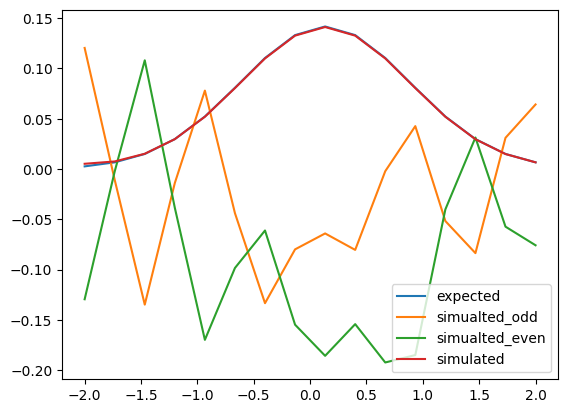

simulated prob: [0.00518 0.0075  0.01515 0.02968 0.05198 0.08047 0.10998 0.13267 0.14123
 0.13266 0.10999 0.08047 0.05195 0.0296  0.01489 0.00661]
expected prob: [0.0026  0.00663 0.01494 0.02972 0.05215 0.08078 0.11041 0.13318 0.14177
 0.13318 0.11041 0.08078 0.05215 0.02972 0.01494 0.00663]
PASSED


In [68]:
x = np.linspace(MIN, MAX, 2**NUM_QUBITS)
# simulated = [0.09472487962367022, 0.0005494248011740668, 0.0904938054334136, 0.005269005954149731, 0.10582301192061445, 0.03531685492508079, 0.06533057372402222, 0.09197744787147595, 0.1169733294799882, 0.0917191321874338, 0.11213216770708226, 0.10917571494171097, 0.013155467330462939, 0.024306277917593603, 0.013025126871953702, 0.030027779310164076]
# simulated = [0.0002547665690941403, 0.0005336921707615068, 0.0021792257637536882, 0.008362408809949443, 0.0256469490701196, 0.06146702035050962, 0.11483541813423556, 0.1671099239261562, 0.18934327689631375, 0.16707484043661586, 0.11484432007059955, 0.06147985344934408, 0.02562063409482208, 0.008316195268052783, 0.0021049989845658423, 0.00041456368058148625]
simulated = normalize([(even+odd) for even, odd in zip(a3_qsvt_even, a3_qsvt_odd)])
print(np.sum(simulated))
expected = normalize(
    [
        (F(((MAX - MIN) * x / 2**NUM_QUBITS) + MIN))
        for x in range(2**NUM_QUBITS)
    ]
)

plt.plot(x, expected, label="expected")
plt.plot(x, a3_qsvt_odd, label="simualted_odd")
plt.plot(x, a3_qsvt_even, label="simualted_even")
plt.plot(x, simulated, label="simulated")
plt.legend()
plt.show()

print("simulated prob:", np.round(simulated, 5))
print("expected prob:", np.round(expected, 5))

# assert the probabilities sum to 1
assert np.allclose(np.sum(simulated), 1)
assert np.allclose(np.sum(expected), 1)

# assert the probabilities are close to the ground truth
assert np.allclose(simulated, expected, atol=1e-2)
print("PASSED")